<a href="https://colab.research.google.com/github/saeedzou/Deep-Learning-Project/blob/dev-saeed/coco_people_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import json
import os
import cv2
import numpy as np
import torch
from pycocotools.coco import COCO
from torchvision import transforms
from torch.utils.data import Dataset


In [ ]:
!wget http://images.cocodataset.org/annotations/annotations_trainval2014.zip
!unzip annotations_trainval2014.zip
!wget http://images.cocodataset.org/zips/train2014.zip
!unzip train2014.zip

--2023-02-10 16:49:21--  http://images.cocodataset.org/annotations/annotations_trainval2014.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.217.206.9, 54.231.161.177, 52.216.32.217, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|52.217.206.9|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 252872794 (241M) [application/zip]
Saving to: ‘annotations_trainval2014.zip’

annotations_trainva 100%[===================>] 241.16M  45.2MB/s    in 5.8s    

2023-02-10 16:49:27 (41.8 MB/s) - ‘annotations_trainval2014.zip’ saved [252872794/252872794]

Archive:  annotations_trainval2014.zip
  inflating: annotations/instances_train2014.json  
  inflating: annotations/instances_val2014.json  
  inflating: annotations/person_keypoints_train2014.json  
  inflating: annotations/person_keypoints_val2014.json  
  inflating: annotations/captions_train2014.json  
  inflating: annotations/captions_val2014.json  
--2023-02-10 16:49:36--  http://imag

In [ ]:
import json
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pycocotools.coco import COCO
import torch
# Load the annotations file
annFile = '/content/annotations/instances_train2014.json'
coco = COCO(annFile)

# Get the list of image IDs that have people in them
catIds = coco.getCatIds(catNms=['person'])
imgIds = coco.getImgIds(catIds=catIds)
# create a dataset of images with people in them
dataset = []
for imgId in imgIds:
    img = coco.loadImgs(imgId)[0]
    dataset.append(img)
# count the number of images in the dataset
print(len(dataset))

In [ ]:
import json
import os
import cv2
import numpy as np
import torch
from pycocotools.coco import COCO
from torchvision import transforms
from torch.utils.data import Dataset

class COCOPeopleDataset(Dataset):
    def __init__(self, annFile,captions_path, transforms=None):
        self.coco = COCO(annFile)
        self.coco_caps = COCO(captions_path)
        self.imgIds = self.coco.getImgIds(catIds=self.coco.getCatIds(catNms=['person']))
        self.transforms = transforms

    def __len__(self):
        return len(self.imgIds)

    def __getitem__(self, idx):
        img = self.coco.loadImgs(self.imgIds[idx])[0]
        path = os.path.join('train2014/', img['file_name'])
        image = cv2.imread(path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = image.astype(np.float32) / 255.0
        # load image captions
        annIds = self.coco_caps.getAnnIds(imgIds=img['id'])
        anns = self.coco_caps.loadAnns(annIds)
        #first caption
        caption = anns[0]['caption']

        if self.transforms is not None:
            image = self.transforms(image)
        return image,caption

# Apply desired transformations
transforms = transforms.Compose([transforms.ToTensor(), transforms.Resize((224, 224)), transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])

# Create the dataset
dataset = COCOPeopleDataset(annFile='/content/annotations/instances_train2014.json',captions_path='/content/annotations/captions_train2014.json', transforms=transforms)

In [ ]:
dataset[0]

(tensor([[[-0.2746, -0.2468, -0.1754,  ..., -0.1067, -0.1580, -0.1961],
          [-0.2623, -0.1841, -0.2390,  ..., -0.1442, -0.1328, -0.1467],
          [-0.2363, -0.3208, -0.2348,  ..., -0.1279, -0.1063, -0.1337],
          ...,
          [ 0.0185,  0.4134,  0.2769,  ...,  0.8928,  2.0578,  2.2085],
          [ 0.1481,  0.3400,  0.1771,  ...,  0.3087,  2.1374,  2.1528],
          [ 0.1614,  0.3503,  0.1200,  ...,  0.3215,  1.3903,  2.1674]],
 
         [[ 0.5814,  0.6078,  0.5953,  ...,  0.6542,  0.6491,  0.6538],
          [ 0.5870,  0.6164,  0.6492,  ...,  0.6540,  0.6639,  0.6458],
          [ 0.6194,  0.6512,  0.6256,  ...,  0.6932,  0.6733,  0.6556],
          ...,
          [-1.0267, -0.5453, -0.6259,  ...,  0.9702,  2.3144,  2.4035],
          [-0.9461, -0.6091, -0.8932,  ...,  0.3040,  2.3761,  2.3811],
          [-0.9097, -0.7270, -1.0058,  ...,  0.3369,  1.5904,  2.4152]],
 
         [[ 1.5349,  1.5263,  1.5642,  ...,  1.5150,  1.5054,  1.4732],
          [ 1.5602,  1.5615,

In [ ]:
dataloader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=True, num_workers=2)

NameError: ignored

torch.Size([32, 3, 224, 224])
('A couple of baseball players standing on top of a field.', 'A pair of street clocks posed on a bridge overlooking a river.', 'A skier posing for a photo in front of a house.', 'A group of people sitting at a table eating a meal.', 'Blonde female in blue garment handing something over.', 'A man holding a yellow frisbee in his hands on a field.', 'Three guys posing together while holding and eating bananas.', 'A long white train traveling down train tracks.', 'a person on the ground in a field with a frisbee', 'A man in ski gear skiing down a slope.', 'A woman takes a bite from a large slice of pizza.', 'A couple of people riding skis on top of a snow covered slope.', 'A mime mimicking a woman nearby talking on a cell phone.', 'A woman with a banana in a room.', 'a boy is taking a swing at a tennis ball', 'A fire truck sitting in the middle of a street.', 'A plate of breakfast food with eggs and fruit.', 'a man getting his necktie tied by President Obama',

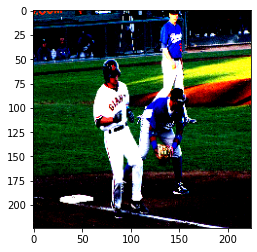

In [ ]:
for i, (images, captions) in enumerate(dataloader):
    print(images.shape)
    print(captions[0])
    # un
    plt.imshow(images[0].permute(1, 2, 0))
    plt.show()
    break